In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [105]:
def ratio_for_id(state_id):
    df_heartbeats = pd.read_csv(
        f"measurements/heartbeat_{state_id}.log", delimiter=" ", skipinitialspace=True, index_col="Beat")
    df_heartbeats = df_heartbeats.groupby("Tag").mean()
    rate = df_heartbeats["Global_Rate"].mean()
    energy = df_heartbeats["Global_Power"].mean()
    return {"heartrate":rate,"power":energy}

In [106]:
results = [ratio_for_id(i) for i in range(12)]
results

[{'heartrate': 170.87804054609165, 'power': 10.071585841509433},
 {'heartrate': 176.07739923972238, 'power': 10.242170637479978},
 {'heartrate': 173.80773869454939, 'power': 10.74342198381004},
 {'heartrate': 431.4769927066273, 'power': 12.13523657471507},
 {'heartrate': 463.16962191582155, 'power': 11.668062524137932},
 {'heartrate': 452.57718554316983, 'power': 11.65454536116741},
 {'heartrate': 722.8567520196152, 'power': 13.294954211706647},
 {'heartrate': 736.6689145426342, 'power': 13.041498604681166},
 {'heartrate': 746.1609440838179, 'power': 13.084116691315407},
 {'heartrate': 1034.968374338193, 'power': 14.364219184523808},
 {'heartrate': 1058.0745881435653, 'power': 14.350337375084006},
 {'heartrate': 1016.3341701279691, 'power': 14.212032205769896}]

In [107]:
from measure_states import read_cpu_config

config = read_cpu_config()

In [108]:
import pandas as pd

areas = {}

for cores, g in pd.DataFrame(config,dtype=int).T.groupby("cores"):
    areas[cores] = [g.index.astype("int").min(),g.index.astype("int").max()]

areas

/tmp/ipykernel_186502/903466625.py:5: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  for cores, g in pd.DataFrame(config,dtype=int).T.groupby("cores"):


{'0': [0, 2], '1': [3, 5], '2': [6, 8], '3': [9, 11]}

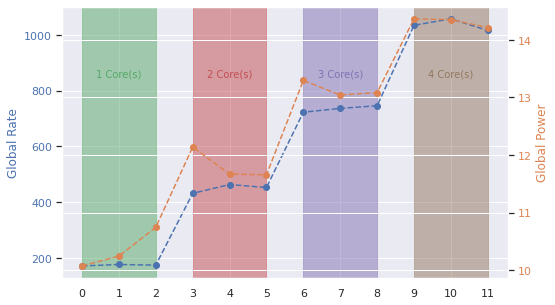

In [109]:
fig, ax1 = plt.subplots(figsize=(8, 5))

for cores, a in areas.items():
    ax1.axvspan(a[0], a[1], color=f"C{int(cores)+2}", alpha=0.5)
    ax1.text((a[0]+a[1])/2, 850, f"{int(cores)+1} Core(s)",
             color=f"C{int(cores)+2}", horizontalalignment="center", fontsize=10)

ax1.plot(range(12), [results[i]["heartrate"]
         for i in range(12)], "--o", label="heartrate", color="C0")
ax1.tick_params(axis='y', labelcolor="C0")
ax1.set_ylabel('Global Rate', color="C0")
ax1.set_xticks(range(12))

ax2 = ax1.twinx()
ax2.plot(range(12), [results[i]["power"]
         for i in range(12)], "--o", label="power", color="C1")
ax2.tick_params(axis='y', labelcolor="C1")
ax2.set_ylabel('Global Power', color="C1")
fig.savefig("figures/cpu_states.png", dpi=300)


In [92]:
import csv

with open("config/control_config","w") as f:
    writer = csv.DictWriter(f,["#id","Speedup","Power"],delimiter="\t")
    writer.writeheader()
    for i,r in enumerate(results):
        writer.writerow({
            "#id":i,
            "Speedup":round(r["heartrate"] / results[0]["heartrate"],6),
            "Power":round(r["power"] / results[0]["power"],6)
        })
